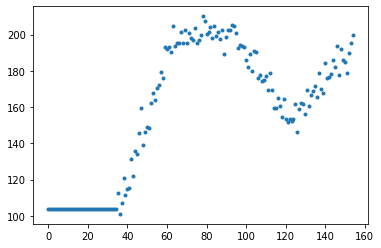

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154]


In [33]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()
%matplotlib inline

df = pd.read_excel("QuenchValve.xlsx")

xdata = np.array(df['x'])
xdata = (xdata-xdata.min())/1000000000/60
xdata = xdata.astype(int)
ydata = np.array(df['y'])

plt.plot(xdata, ydata, '.')
plt.show()
print(xdata)


In [34]:
def CalculateBreaksAndPlot(xdata, ydata, x, y, dy, d2y):
    ranges=[[-1000,-0.5],[-0.5,0.5],[0.5,1000]]
    breaks = [xdata[0]]
    for ran in range(len(ranges)):
        if ranges[ran][0] <= dy[0] <= ranges[ran][-1]:
            firstSlope = ran

    for i in range(len(dy)):
        for ran in range(len(ranges)):
            if ranges[ran][0] <= dy[i] <= ranges[ran][-1]:
                thisSlope = ran
                break
        if thisSlope == firstSlope:
            continue
        else:
            breaks.append(x[i])
            firstSlope = thisSlope

    plt.plot(xdata,ydata, '.')
    for i in range(len(breaks)):
        plt.axvline(x=breaks[i], linestyle='--')
    plt.show()

    plt.plot(x, y, '.')
    for i in range(len(breaks)):
        plt.axvline(x=breaks[i], linestyle='--')
    plt.show()

    plt.plot(x, dy, '.')
    for i in range(len(breaks)):
        plt.axvline(x=breaks[i], linestyle='--')
    plt.show()
    plt.plot(x, d2y)
    for i in range(len(breaks)):
        plt.axvline(x=breaks[i], linestyle='--')
    plt.show()
    
    return

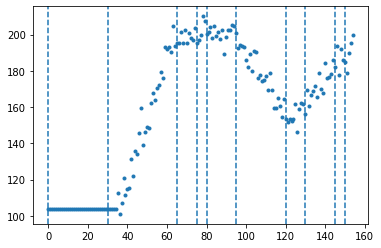

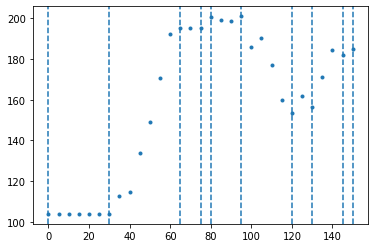

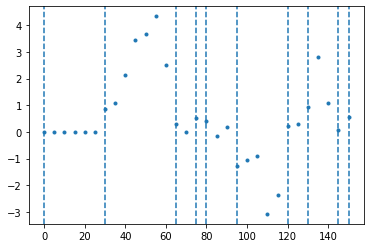

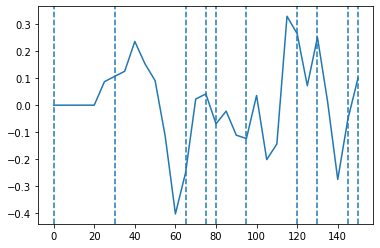

In [35]:
# take every 5th point

n_points = 5

ydata1 = [ydata[i] for i in range(len(ydata)) if i % n_points == 0]
xdata1 = [xdata[i] for i in range(len(ydata)) if i % n_points == 0]

dy = np.gradient(ydata1, xdata1)
d2y = np.gradient(dy, xdata1)
CalculateBreaksAndPlot(xdata, ydata, xdata1, ydata1, dy, d2y)

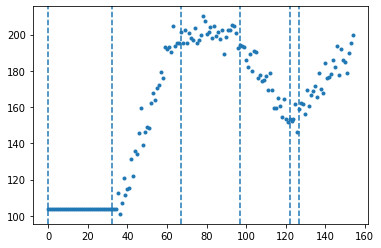

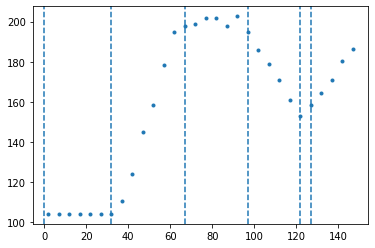

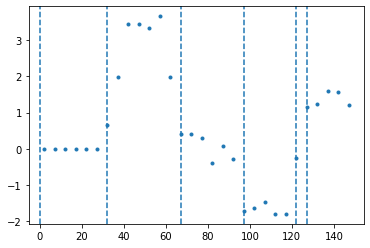

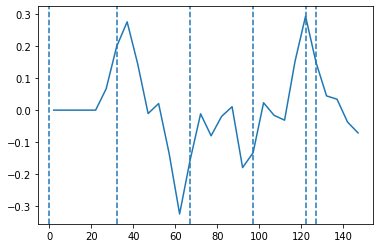

In [40]:
# centroid of every five points

n_points = 5

yAvg = [sum(ydata[i:i+n_points])/n_points for i in range(0,len(ydata),n_points)][:-1]
xAvg = [sum(xdata[i:i+n_points])/n_points for i in range(0,len(xdata),n_points)][:-1]

dyAvg = np.gradient(yAvg, xAvg)
d2yAvg = np.gradient(dyAvg, xAvg)

sets = [[]]
setIndex = 0

CalculateBreaksAndPlot(xdata, ydata, xAvg, yAvg, dyAvg, d2yAvg)

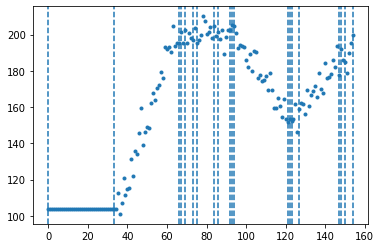

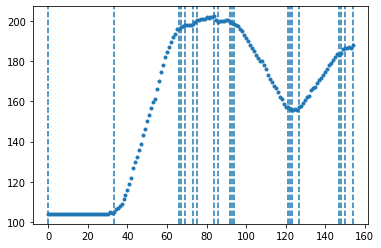

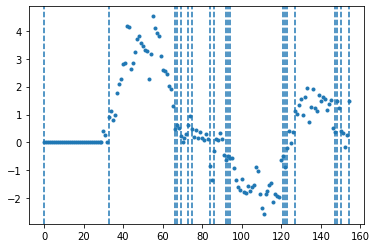

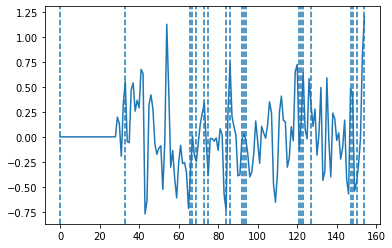

In [41]:
# Moving averages

M = 10 # number of points to average

x = xdata
y = []

for i in range(len(ydata)):
    l = i - (M+1)/2
    r = i + (M+1)/2
    if l < 0:
        l = 0
    if r > len(ydata):
        r = len(ydata) - 1

    ySet = ydata[int(l):int(r)]
    y.append(np.mean(ySet))

dy = np.gradient(y, x)
d2y = np.gradient(dy, x)

CalculateBreaksAndPlot(xdata, ydata, x, y, dy, d2y)